<a href="https://colab.research.google.com/github/rshar95/Customer-Segmentation-Models/blob/main/data_cleaning_and_classification_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
#data = load_diabetes()
#print(data)


df = pd.read_csv ("application_record.csv")
print(df.shape)
df.sort_values(by=['ID'])
print(df.head())
n,m = df.shape

(438557, 18)
        ID CODE_GENDER  ... OCCUPATION_TYPE CNT_FAM_MEMBERS
0  5008804           M  ...             NaN             2.0
1  5008805           M  ...             NaN             2.0
2  5008806           M  ...  Security staff             2.0
3  5008808           F  ...     Sales staff             1.0
4  5008809           F  ...     Sales staff             1.0

[5 rows x 18 columns]


# New Section

In [ ]:
column = list(df)
print(column)
df[column[-2]].head()
print(len(df[column[-2]]))
mode = df[column[-2]].mode()
print(mode)
#df_train.groupby(['Electrical']).count()['x'].idxmax()
#print(df.groupby([column[-2]]).count()[column[-2]].idxmax())
df[column[-2]] = df[column[-2]].fillna( mode)
print(df[column[-2]].head(100))

## Loading target variables dataset
target = pd.read_csv ("credit_record.csv")
target.head().T

['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
438557
0    Laborers
dtype: object
0           Laborers
1                NaN
2     Security staff
3        Sales staff
4        Sales staff
           ...      
95          Laborers
96          Laborers
97          Laborers
98          Laborers
99          Laborers
Name: OCCUPATION_TYPE, Length: 100, dtype: object


,0,1,2,3,4
ID,5001711,5001711,5001711,5001711,5001712
MONTHS_BALANCE,0,-1,-2,-3,0
STATUS,X,0,0,0,C


## Finding Intersection of the indices  

In [ ]:
valid_indexes = list( set(df.index).intersection(set(target.index)) ) 
len( valid_indexes )
df = df.loc[valid_indexes]
target = target.loc[valid_indexes]
print(df.shape)
print(target.shape)
df.head().T


(438557, 18)
(438557, 3)


,0,1,2,3,4
ID,5008804,5008805,5008806,5008808,5008809
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500,427500,112500,270000,270000
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married
NAME_HOUSING_TYPE,Rented apartment,Rented apartment,House / apartment,House / apartment,House / apartment


## Merging both data sets

In [ ]:
record = pd.merge(target, df, on='ID', how='right')
record.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
1,5008804,-1.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
2,5008804,-2.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
3,5008804,-3.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
4,5008804,-4.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0


In [ ]:
def status(x):
    if x == 'C' or x == 'X' or x == '0' or x == '1' or x == '2':
        return 0
    elif x == '3' or x == '4' or x == '5':
        return 1

def gender_num(x):
   if x=='M':
     return 0
   else:
     return 1; 

def car_own(x):
   if x =='Y':
     return 0;
   else:
     return 1; 

record['STATUS_BIN']=record['STATUS'].apply(lambda x: status(x))
record['CODE_GENDER_N']=record['CODE_GENDER'].apply(lambda x: gender_num(x))
record['OWN_CAR_N']=record['FLAG_OWN_CAR'].apply(lambda x: car_own(x))

record.head(20)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_BIN,CODE_GENDER_N,OWN_CAR_N
0,5008804,0.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
1,5008804,-1.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
2,5008804,-2.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
3,5008804,-3.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
4,5008804,-4.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
5,5008804,-5.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
6,5008804,-6.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
7,5008804,-7.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
8,5008804,-8.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0
9,5008804,-9.0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0.0,0,0


In [ ]:
record[column[-2]] = record[column[-2]].fillna( mode)
record.dropna(inplace=True)
print(record.head(20))


         ID  MONTHS_BALANCE STATUS  ... STATUS_BIN CODE_GENDER_N OWN_CAR_N
0   5008804             0.0      C  ...        0.0             0         0
1   5008804            -1.0      C  ...        0.0             0         0
2   5008804            -2.0      C  ...        0.0             0         0
3   5008804            -3.0      C  ...        0.0             0         0
4   5008804            -4.0      C  ...        0.0             0         0
5   5008804            -5.0      C  ...        0.0             0         0
6   5008804            -6.0      C  ...        0.0             0         0
7   5008804            -7.0      C  ...        0.0             0         0
8   5008804            -8.0      C  ...        0.0             0         0
9   5008804            -9.0      C  ...        0.0             0         0
10  5008804           -10.0      C  ...        0.0             0         0
11  5008804           -11.0      C  ...        0.0             0         0
12  5008804           -12

In [ ]:
print(record.shape)
record['STATUS_BIN'].value_counts()


(175390, 23)


0.0    175034
1.0       356
Name: STATUS_BIN, dtype: int64

# Logistic Regression

Target y-variables STATUS column
1. categories are either x,c, or 0(not paid for one month) for more than 75% of times, of credit record, status
for 9 months
2. value of 5, on their credit record

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



In [ ]:
record.columns


Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'STATUS_BIN', 'CODE_GENDER_N', 'OWN_CAR_N'],
      dtype='object')

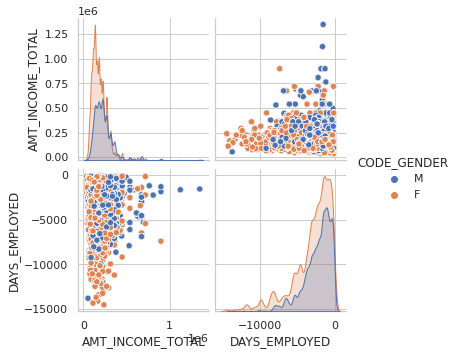

In [ ]:
sns.pairplot(record[['AMT_INCOME_TOTAL','DAYS_EMPLOYED','CODE_GENDER']], hue='CODE_GENDER')

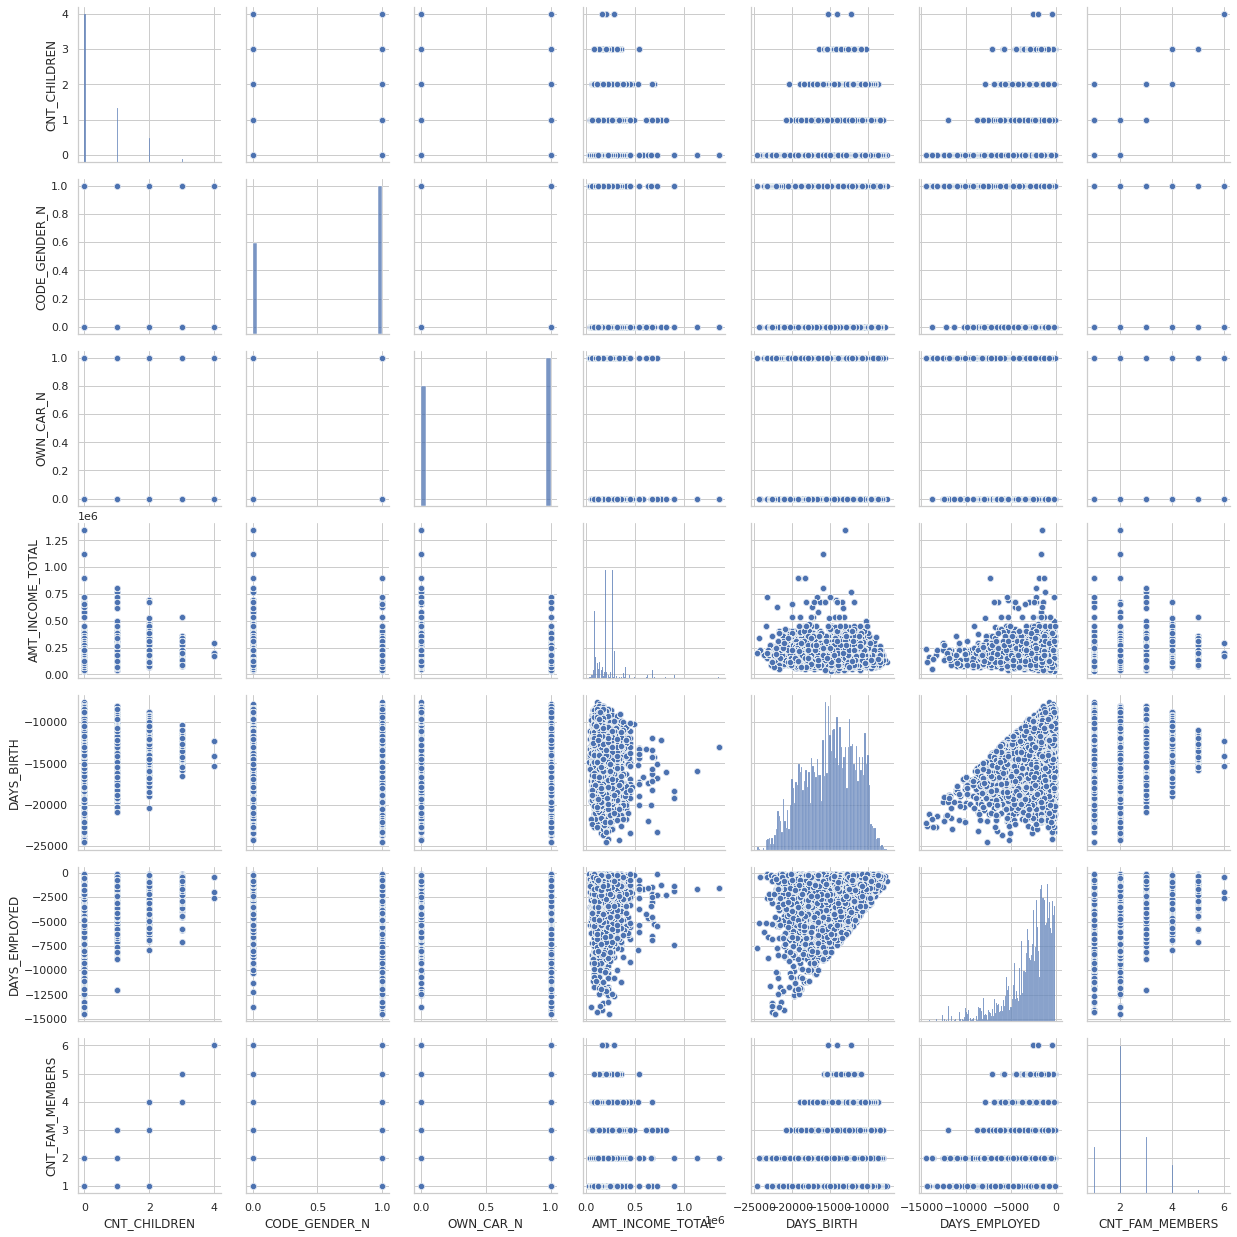

In [ ]:
sns.pairplot(record[['CNT_CHILDREN','CODE_GENDER_N', 'OWN_CAR_N','AMT_INCOME_TOTAL','NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']])

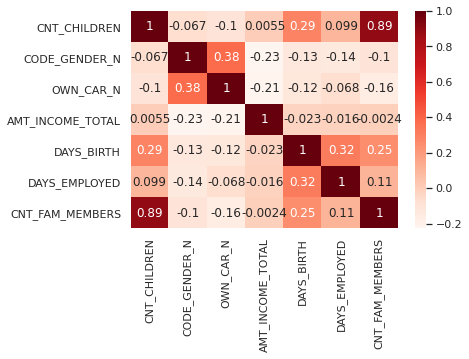

In [ ]:
## Feature Correlation method Pearson
corr = record[['CODE_GENDER','CNT_CHILDREN', 'CODE_GENDER_N','OWN_CAR_N', 'AMT_INCOME_TOTAL','NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True, cmap=plt.cm.Reds)

Checking Correlation graphs of different Features with a Selected Feature

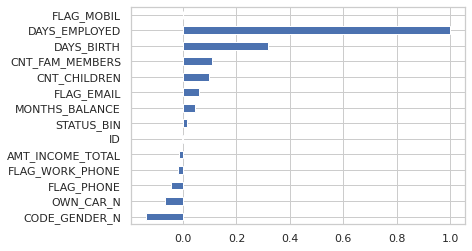

In [ ]:
record.corr()['DAYS_EMPLOYED'].sort_values(ascending=True).plot(kind='barh')

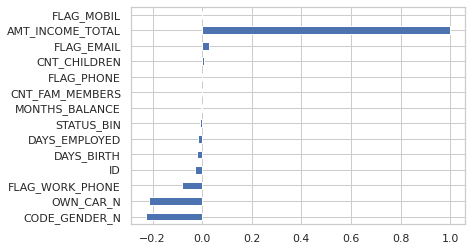

In [ ]:
record.corr()['AMT_INCOME_TOTAL'].sort_values(ascending=True).plot(kind='barh')

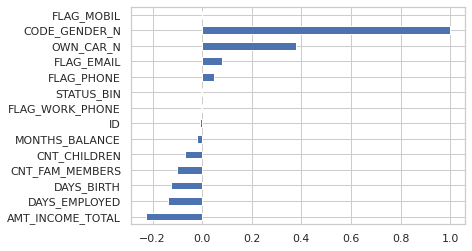

In [ ]:
record.corr()['CODE_GENDER_N'].sort_values(ascending=True).plot(kind='barh')

Using 100K samples from the data set to run **Logistic Regression Prediction Model**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score is 0.42403
     0  1  2  3  4  5      6  7
0  407  0  0  0  0  0  10776  0
1   14  0  0  0  0  0    345  0
2    0  0  0  0  0  0     27  0
3    0  0  0  0  0  0     10  0
4    0  0  0  0  0  0      4  0
5    0  0  0  0  0  0     40  0
6  297  0  0  0  0  0  12314  0
7  174  0  0  0  0  0   5592  0


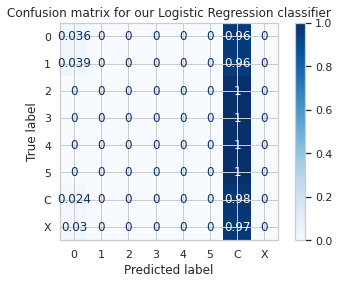

In [ ]:
from sklearn.metrics import plot_confusion_matrix

record_sample = record.sample(100000)
record_sample['STATUS'].value_counts()
train,test = train_test_split(record_sample,test_size=0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
Features = ['CNT_CHILDREN', 'CODE_GENDER_N','OWN_CAR_N','AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
Targets = ['STATUS']
train_x = train[Features]
train_y =train[Targets]
test_x = test[Features]
test_y =test[Targets]
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(train_x,train_y)

predict_y = model.predict(test_x)
print('Accuracy Score is {:.5}'.format(accuracy_score(test_y, predict_y)))
print(pd.DataFrame(confusion_matrix(test_y, predict_y)))
matrix =  plot_confusion_matrix(model, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our Logistic Regression classifier')
plt.show(matrix)
plt.show()



**Building a feature relevance algorithm**

In [ ]:
C = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for c in C:
  model = LogisticRegression(C=c,
                           random_state=0,
                           solver='lbfgs')
  model.fit(train_x,train_y)

  predict_y = model.predict(test_x)
  
  print('Accuracy Score is {:.5}'.format(accuracy_score(test_y, predict_y)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Accuracy Score is 0.42357


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.42443


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.42253


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.4245


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.42367


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.42353


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.42403
Accuracy Score is 0.4242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Highest Accuracy we are getting is with c(lambda)=0.8, and it is 0.42517

[ 2.26583589e-09  1.39942410e-08  1.47650735e-08  1.57642215e-05
 -8.53013320e-05 -1.55601333e-05  9.50586085e-09  3.12261424e-09
  5.22077217e-10  6.57885772e-09]
Feature: CNT_CHILDREN, Score: 0.00000
Feature: CODE_GENDER_N, Score: 0.00000
Feature: OWN_CAR_N, Score: 0.00000
Feature: AMT_INCOME_TOTAL, Score: 0.00002
Feature: DAYS_BIRTH, Score: -0.00009
Feature: DAYS_EMPLOYED, Score: -0.00002
Feature: FLAG_MOBIL, Score: 0.00000
Feature: FLAG_WORK_PHONE, Score: 0.00000
Feature: FLAG_PHONE, Score: 0.00000
Feature: FLAG_EMAIL, Score: 0.00000


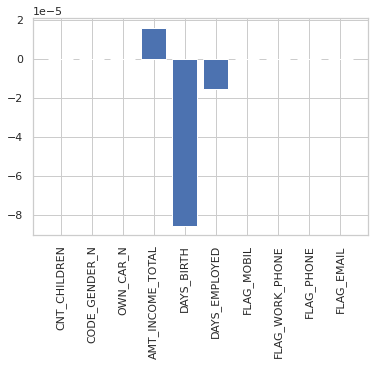

In [ ]:
from matplotlib import pyplot
importance = model.coef_[0]
print(importance)
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (Features[i],v))
# plot feature importance
pyplot.bar([x for x in Features], importance)
plt.xticks(rotation='vertical')
pyplot.show()

Running Logistic model on Binary Status column that seperates y-targets using our catergories mentioned above

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score is 0.99837
       0  1
0  29951  0
1     49  0


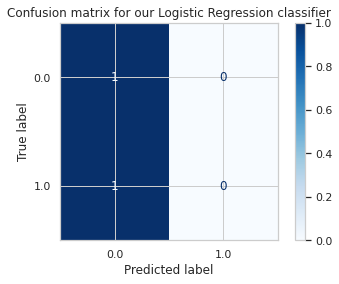

In [ ]:
record_sample = record.sample(100000)
record_sample['STATUS'].value_counts()
train,test = train_test_split(record_sample,test_size=0.3, random_state=21)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
Features = ['CNT_CHILDREN', 'CODE_GENDER_N','OWN_CAR_N','AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED','MONTHS_BALANCE']
Targets = ['STATUS_BIN']
train_x = train[Features]
train_y =train[Targets]
test_x = test[Features]
test_y =test[Targets]
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(train_x,train_y)

predict_y = model.predict(test_x)
print('Accuracy Score is {:.5}'.format(accuracy_score(test_y, predict_y)))
print(pd.DataFrame(confusion_matrix(test_y, predict_y)))
matrix =  plot_confusion_matrix(model, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our Logistic Regression classifier')
plt.show(matrix)
plt.show()



In [ ]:
import sklearn

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import sklearn

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

train_x = train[Features]
train_y =train[Targets]

tuning_params = 10**np.linspace(10,-2,100)*0.5
tuning_params

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

[array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0., -0.,  0.]), array([-0., -0., -0., -0

Text(0, 0.5, 'Standardized Betas (weights)')

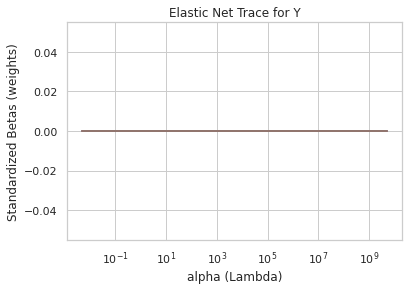

In [ ]:
ElNet = ElasticNet(max_iter = 10000, normalize = True)
coefs = []

for a in tuning_params:
    ElNet.set_params(alpha=a, l1_ratio=0.5)
    ElNet.fit(train_x, train_y)
    coefs.append(ElNet.coef_)
print(coefs)
print(np.shape(coefs))

ax = plt.gca()
ax.plot(tuning_params, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.title('Elastic Net Trace for Y')
plt.xlabel('alpha (Lambda)')
plt.ylabel('Standardized Betas (weights)')

In [ ]:
en_cv = ElasticNetCV(alphas =tuning_params, cv = 10, max_iter = 10000,n_jobs=8,normalize = True)
en_cv.fit(train_x,train_y)
en_pred = en_cv.predict(test_x)
print ("Test MSE - Elastic Net Regression:",((mean_squared_error(test_y, en_pred ))))
print ("Tuning parameter for Elastic Net Regression (lambda value):",(en_cv.alpha_))
print ("Tuning parameter for Elastic Net Regression (l1 ratio value):",(en_cv.l1_ratio_))
print ("Elastic Net Score (R squared) :",((ElasticNet.score(en_cv, test_x,test_y))))

c=en_cv.coef_
c
print(pd.Series(c, test_x.columns)) # Print coefficients

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test MSE - Elastic Net Regression: 0.0017304530612244904
Tuning parameter for Elastic Net Regression (lambda value): 5000000000.0
Tuning parameter for Elastic Net Regression (l1 ratio value): 0.5
Elastic Net Score (R squared) : -7.17622738650725e-05
CNT_CHILDREN       -0.0
CODE_GENDER_N      -0.0
OWN_CAR_N          -0.0
AMT_INCOME_TOTAL   -0.0
DAYS_BIRTH         -0.0
DAYS_EMPLOYED       0.0
dtype: float64


In [ ]:
record_sample['AMT_INCOME_TOTAL'].value_counts()

135000.0    10105
180000.0     9897
225000.0     9137
157500.0     7913
270000.0     7334
            ...  
91530.0         4
168750.0        3
441000.0        3
324000.0        3
132750.0        2
Name: AMT_INCOME_TOTAL, Length: 134, dtype: int64

Accuracy Score is 0.4242
     0  1  2  3  4  5      6  7
0  298  0  0  0  0  0  10885  0
1   11  0  0  0  0  0    348  0
2    0  0  0  0  0  0     27  0
3    0  0  0  0  0  0     10  0
4    0  0  0  0  0  0      4  0
5    0  0  0  0  0  0     40  0
6  183  0  0  0  0  0  12428  0
7  103  0  0  0  0  0   5663  0


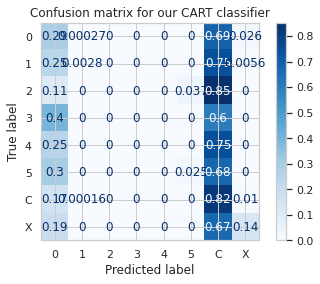

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(train_x, train_y)
y_predict = model.predict(test_x)

print('Accuracy Score is {:.5}'.format(accuracy_score(test_y, predict_y)))
print(pd.DataFrame(confusion_matrix(test_y, predict_y)))

matrix =  plot_confusion_matrix(model, test_x, test_y,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our CART classifier')
plt.show(matrix)
plt.show()

[0.03892221 0.02853721 0.01895052 0.19733009 0.3595096  0.25672139
 0.         0.04535475 0.03996392 0.01471031]
Feature: CNT_CHILDREN, Score: 0.03892
Feature: CODE_GENDER_N, Score: 0.02854
Feature: OWN_CAR_N, Score: 0.01895
Feature: AMT_INCOME_TOTAL, Score: 0.19733
Feature: DAYS_BIRTH, Score: 0.35951
Feature: DAYS_EMPLOYED, Score: 0.25672
Feature: FLAG_MOBIL, Score: 0.00000
Feature: FLAG_WORK_PHONE, Score: 0.04535
Feature: FLAG_PHONE, Score: 0.03996
Feature: FLAG_EMAIL, Score: 0.01471


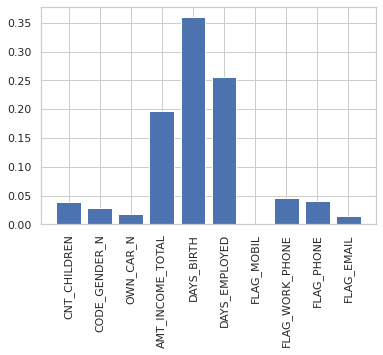

In [ ]:
importance = model.feature_importances_
print(importance)
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (Features[i],v))
# plot feature importance
pyplot.bar([x for x in Features], importance)
plt.xticks(rotation='vertical')
pyplot.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.495366 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.495366 to fit



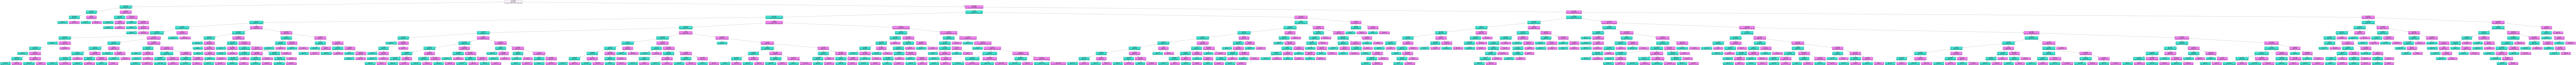

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
colors = ('turquoise', 'violet')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')  
Image(graph.create_png())